In [28]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
#Importing dataset
dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
X = dataset.iloc[ : , [2,3]].values
y = dataset.iloc[ : , 4].values

In [30]:
#Splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
#Feature scaling for X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [33]:
#Predicting the test set results
y_pred = classifier.predict(X_test)

In [34]:
#Evaluating the prediction
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

IndexError: index 2 is out of bounds for axis 1 with size 2

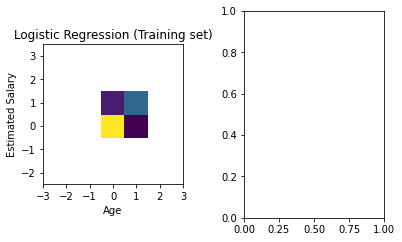

In [35]:
#Visualizing the results
#import seaborn as sns
fit, (ax1, ax2) = plt.subplots(1, 2)
fit.tight_layout(pad=3) 
#training
ax1.title.set_text('Logistic Regression (Training set)')
ax1.imshow(cm)
ax1.grid(False)
ax1.set_xlabel('Age', color='black')
ax1.set_ylabel('Estimated Salary', color='black')
ax1.xaxis.set(ticks=range(-3,4))
ax1.yaxis.set(ticks=range(-2,4))
ax1.set_ylim(-2.5, 3.5)
#ax1.scatter(X_train[:, [2,3]], y_train, color = 'red')
#ax1.plot(X_train[:, 2], classifier.predict(X_train), color = 'blue')

#testing
ax2.title.set_text('Logistic Regression (Test set)')
ax2.imshow(cm)
ax2.grid(False)
ax2.set_xlabel('Age', color='black')
ax2.set_ylabel('Estimated Salary', color='black')
ax2.xaxis.set(ticks=range(-3,4))
ax2.yaxis.set(ticks=range(-2,4))
ax2.set_ylim(-2.5, 3.5)
#ax2.scatter(X_test[:, 2], y_test, color = 'red')
#ax2.plot(X_test[:, 2], classifier.predict(X_test), color = 'blue')